In [1]:
from src.visualize_classifier_results import find_classify_checkpoint
%cd ..
pd = find_classify_checkpoint()

C:\mywork\python\MachineVisionExperiments\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-07 15:06:20,448	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-07 15:06:20,732	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


C:\mywork\python\MachineVisionExperiments
Logging to C:\mywork\python\MachineVisionExperiments\log\application_13960.log


In [2]:
pd

,batch_size,cnn_layers,fcn_layers,final_channels,learning_rate,starting_channels,v_loss,total_params,checkpoint_path
0,250,4,7,207,0.000082,18,1.023887,723483,C:\mywork\python\MachineVisionExperiments\chec...
1,250,4,6,338,0.000414,24,0.772549,1516858,C:\mywork\python\MachineVisionExperiments\chec...
2,100,4,7,159,0.000010,33,1.584668,522333,C:\mywork\python\MachineVisionExperiments\chec...
3,250,6,5,255,0.002300,32,0.566755,1164077,C:\mywork\python\MachineVisionExperiments\chec...
4,125,7,4,364,0.000850,22,0.570501,1893671,C:\mywork\python\MachineVisionExperiments\chec...
...,...,...,...,...,...,...,...,...,...
58,100,5,7,200,0.000132,28,0.860809,827079,C:\mywork\python\MachineVisionExperiments\chec...
59,100,6,6,347,0.001412,18,0.758641,1915117,C:\mywork\python\MachineVisionExperiments\chec...
60,250,6,5,344,0.000278,18,0.823125,1677553,C:\mywork\python\MachineVisionExperiments\chec...
61,250,5,5,194,0.000011,26,1.460128,624951,C:\mywork\python\MachineVisionExperiments\chec...


Let's calculate the efficiency based on the number of parameters.

In [2]:
efficiency = 1 / (pd.v_loss * pd.total_params)

In [5]:
efficiency

0     1.349956e-06
1     8.533539e-07
2     1.208131e-06
3     1.515734e-06
4     9.256338e-07
          ...     
58    1.404580e-06
59    6.882849e-07
60    7.241992e-07
61    1.095880e-06
62    2.178960e-06
Length: 63, dtype: float64

In [3]:
pd.insert(8,'efficiency',efficiency)

In [7]:
pd

,batch_size,cnn_layers,fcn_layers,final_channels,learning_rate,starting_channels,v_loss,total_params,efficiency,checkpoint_path
0,250,4,7,207,0.000082,18,1.023887,723483,1.349956e-06,C:\mywork\python\MachineVisionExperiments\chec...
1,250,4,6,338,0.000414,24,0.772549,1516858,8.533539e-07,C:\mywork\python\MachineVisionExperiments\chec...
2,100,4,7,159,0.000010,33,1.584668,522333,1.208131e-06,C:\mywork\python\MachineVisionExperiments\chec...
3,250,6,5,255,0.002300,32,0.566755,1164077,1.515734e-06,C:\mywork\python\MachineVisionExperiments\chec...
4,125,7,4,364,0.000850,22,0.570501,1893671,9.256338e-07,C:\mywork\python\MachineVisionExperiments\chec...
...,...,...,...,...,...,...,...,...,...,...
58,100,5,7,200,0.000132,28,0.860809,827079,1.404580e-06,C:\mywork\python\MachineVisionExperiments\chec...
59,100,6,6,347,0.001412,18,0.758641,1915117,6.882849e-07,C:\mywork\python\MachineVisionExperiments\chec...
60,250,6,5,344,0.000278,18,0.823125,1677553,7.241992e-07,C:\mywork\python\MachineVisionExperiments\chec...
61,250,5,5,194,0.000011,26,1.460128,624951,1.095880e-06,C:\mywork\python\MachineVisionExperiments\chec...


In [4]:
pd.v_loss.median()

np.float64(0.7607917487621307)

<Axes: xlabel='learning_rate', ylabel='efficiency'>

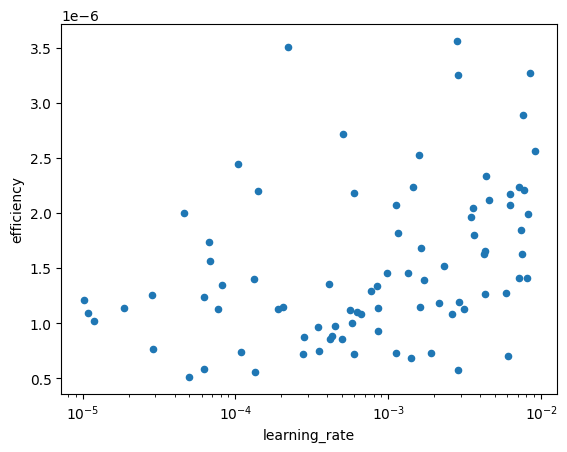

In [5]:
pd.plot(x='learning_rate',y='efficiency',logx=True, kind='scatter')

<Axes: xlabel='learning_rate', ylabel='efficiency'>

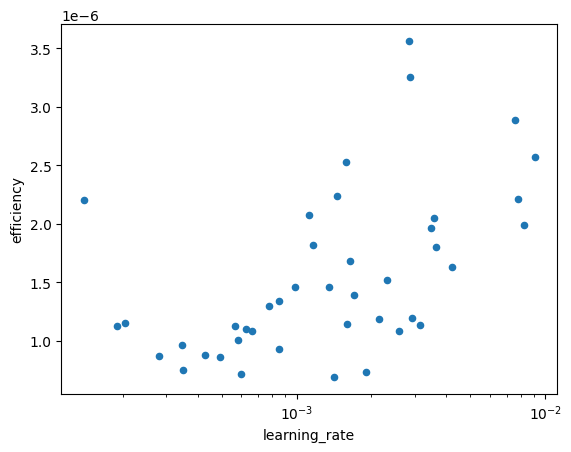

In [6]:
median_vloss = pd.v_loss.median()
lower_loss = pd[pd.v_loss < median_vloss]
lower_loss.plot(x='learning_rate',y='efficiency',logx=True, kind='scatter')

<Axes: xlabel='final_channels', ylabel='efficiency'>

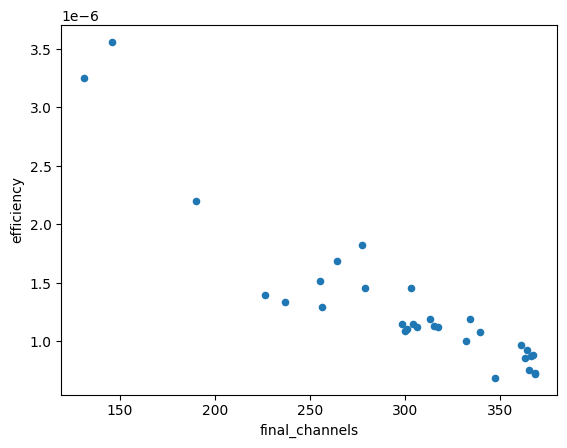

In [13]:
lower_loss.plot(x='final_channels',y='efficiency', kind='scatter')

<Axes: xlabel='final_channels', ylabel='v_loss'>

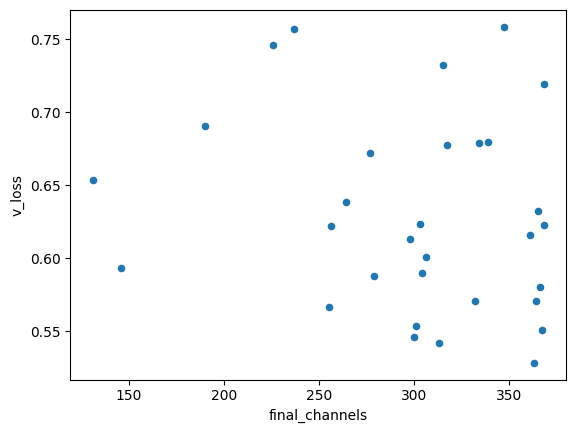

In [14]:
lower_loss.plot(x='final_channels', y='v_loss', kind='scatter')

<Axes: xlabel='starting_channels', ylabel='efficiency'>

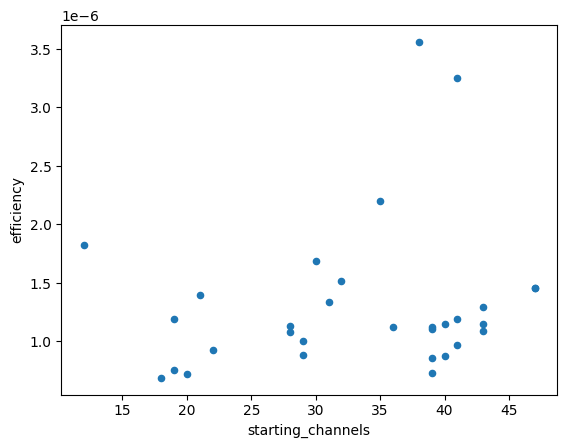

In [15]:
lower_loss.plot(x='starting_channels', y='efficiency', kind='scatter')

<Axes: xlabel='batch_size', ylabel='efficiency'>

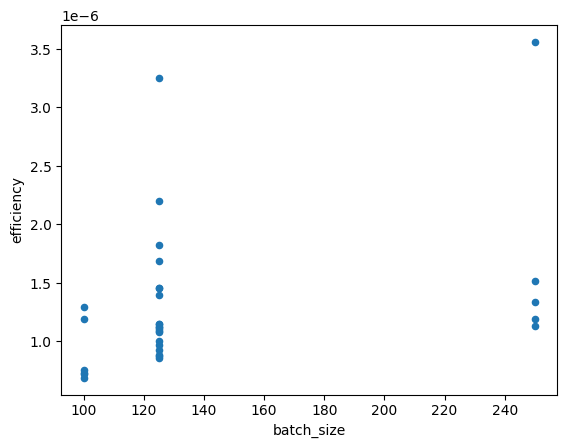

In [16]:
lower_loss.plot(x='batch_size', y='efficiency', kind='scatter')

<Axes: xlabel='cnn_layers', ylabel='efficiency'>

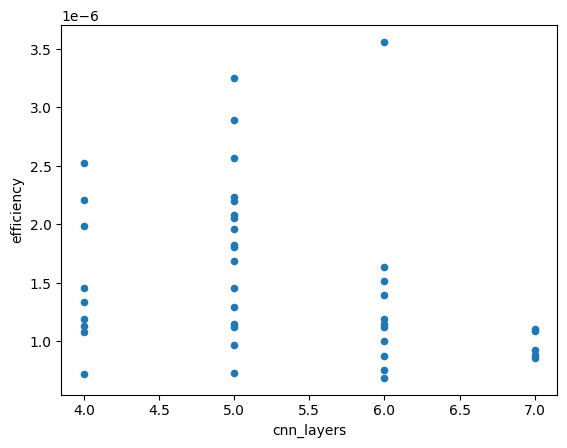

In [7]:
lower_loss.plot(x='cnn_layers', y='efficiency', kind='scatter')

<Axes: xlabel='fcn_layers', ylabel='efficiency'>

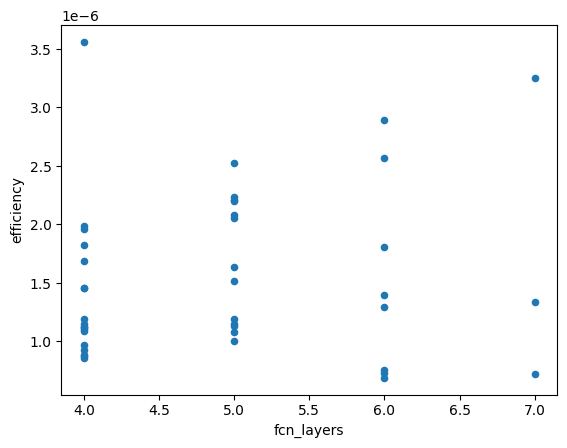

In [8]:
lower_loss.plot(x='fcn_layers', y='efficiency', kind='scatter')

<Axes: xlabel='cnn_layers', ylabel='v_loss'>

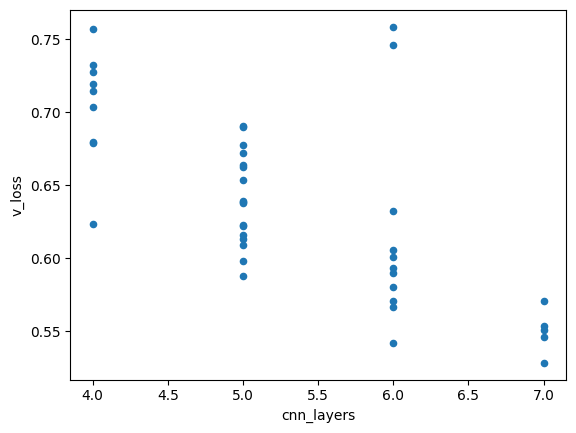

In [9]:
lower_loss.plot(x='cnn_layers', y='v_loss', kind='scatter')

<Axes: xlabel='fcn_layers', ylabel='v_loss'>

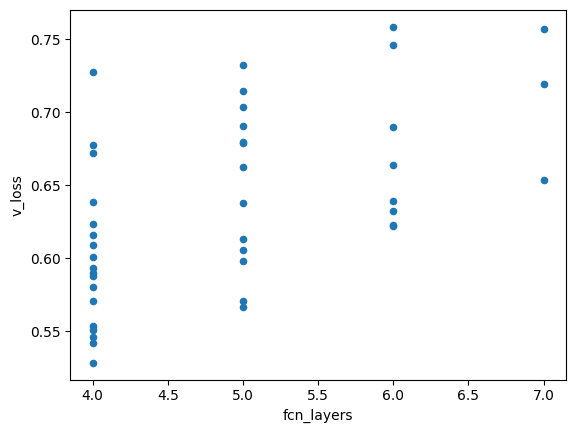

In [10]:
lower_loss.plot(x='fcn_layers', y='v_loss', kind='scatter')